<font color=RED>MEASURES OF DESCRIPTIVE STATISTICS- CENTRAL TENDENCY & SPREAD</font>

In this study, Outliers in a House price data is analysed studied and they are tried to be removed using different methods like

1.Mean Function
2.Percentile method
3.IQR(Inter quartile range method)
4.Normal distribution
5.Zscore method

Also, box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column),correlation between all the numerical columns,its heatmap. are attempted to be ploted here for better idea on the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
F=pd.read_csv("house_price.csv")
F

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


There are in Total 13200 Rows and 7 columns. Out of these 2 are categorical columns and 5 are numerical columns.

In [3]:
F.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


On priliminary Analysis, we can see that there exists outliers in the given data set as a notable difference is seen between mean and standard deviation also between the percentiles and min, max values. Here PRICE column is used to find the outliers using different methods.

In [4]:
F.price.mean()

112.27617765151514

In [5]:
F.price.median()

71.85

<Axes: ylabel='price'>

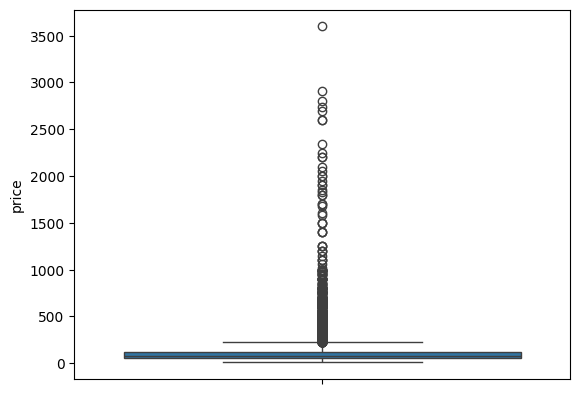

In [6]:
sns.boxplot(F['price'])

<Axes: xlabel='price', ylabel='Count'>

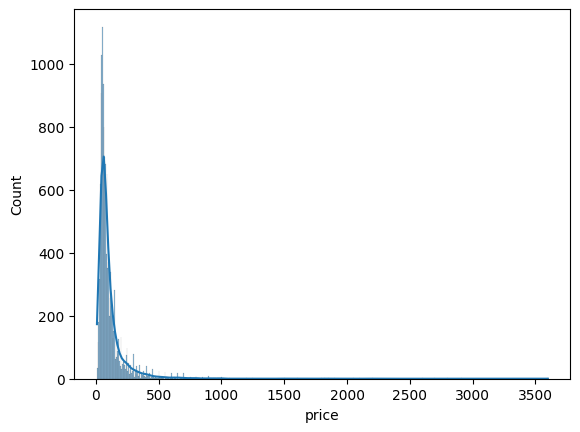

In [7]:
sns.histplot(data=F,x=F.price,kde=True)

There exists significant deifference between mean and median. Indicating presence of outliers. Also from the graph we can see that it is not a normal distribution as the data is Right Skewed.

<font color=RED>PERCENTILE METHOD</font>

In [8]:
F.price.quantile([0.01,0.15,0.25,0.50,0.65,0.75,0.80,0.85,0.89,0.90,0.94,0.95,0.96,0.97,0.98])

0.01     19.0000
0.15     42.0000
0.25     50.0000
0.50     71.8500
0.65     93.0205
0.75    120.0000
0.80    139.0000
0.85    165.0000
0.89    200.0000
0.90    220.0000
0.94    293.0600
0.95    320.0000
0.96    350.0000
0.97    400.0000
0.98    495.0800
Name: price, dtype: float64

In [9]:
F[F.price>F.price.quantile(0.96)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
61,Whitefield,4 Bedroom,5700.0,5.0,650.0,4,11403
120,Hebbal,4 BHK,5611.5,4.0,477.0,4,8500
...,...,...,...,...,...,...,...
13089,Hebbal,4 BHK,4000.0,6.0,370.0,4,9250
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13170,Sarjapur Road,4 BHK,4050.0,2.0,450.0,4,11111
13196,other,4 BHK,3600.0,5.0,400.0,4,11111


From this we can see that there are 521 Outliers. Since the data is Very large we can either remove these data(Trimming) or replace these datas (capping) with a maximum value as outliers exists at maximum range.

In [10]:
#data without outliers

new_f=F[F.price<F.price.quantile(0.96)]
new_f

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


<Axes: xlabel='price', ylabel='Count'>

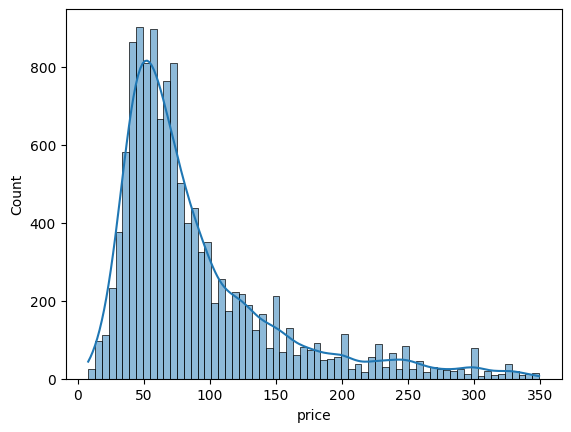

In [11]:
sns.histplot(data=new_f,x=new_f.price,kde=True)

<font color=RED>IQR-INTER QUARTILE RANGE

In [12]:
q1=F.price.quantile(0.25)
q3=F.price.quantile(0.75)
print('q1:',q1)
print('q3:',q3)

q1: 50.0
q3: 120.0


In [13]:
IQR=q3-q1
print("IQR:",IQR)

IQR: 70.0


In [14]:
lower_whisker=q1-1.5*IQR
upper_whisker=q3+1.5*IQR
lower_whisker,upper_whisker

(-55.0, 225.0)

In [15]:
F[(F.price<-55) | (F.price>225)]   #Outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592
18,other,3 BHK,2770.0,4.0,290.0,3,10469
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
...,...,...,...,...,...,...,...
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111


In [16]:
new_f=F[(F.price>-55)& (F.price<225)]    # Data after removing outliers
new_f

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13192,Bellandur,2 BHK,1262.0,2.0,47.00,2,3724
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


By using IQR method, the number of outliers has increased to 1250 reducing the data without Outliers to 11908 compared to the percentile method.

<Axes: xlabel='price', ylabel='Count'>

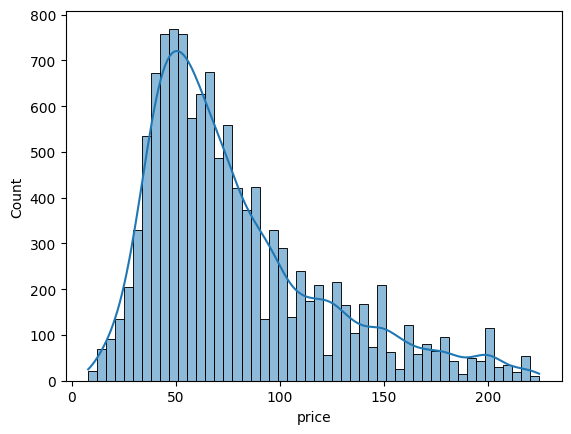

In [17]:
sns.histplot(data=new_f,x=new_f.price,kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1914fe67b30>,
 'caps': [<matplotlib.lines.Line2D at 0x1914fe9c0b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1914fe678c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1914fe9c650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1914fe9c920>],
 'means': []}

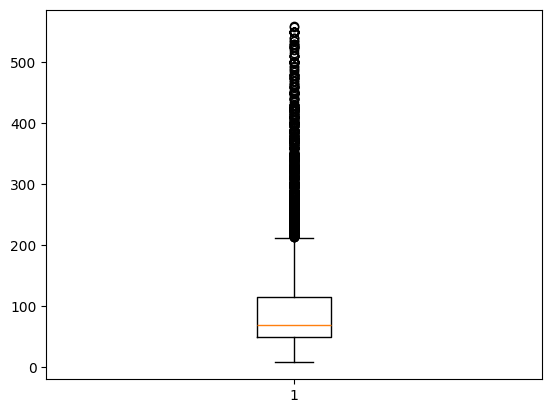

In [52]:
plt.boxplot(new_f['price'])

<font color=RED>NORMAL DISTRIBUTION METHOD</FONT>

In [18]:
m=F.price.mean()
m

112.27617765151514

In [19]:
s=F.price.std()
s

149.17599517809637

In Normla distribution, the outliers lies above +3sigma and below -3sigma.SO we have to find these values to get the outliers

In [20]:
m-3*s

-335.25180788277396

In [21]:
m+3*s

559.8041631858042

In [22]:
F[(F.price<-335) | (F.price>559)]     #Outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.0,4,18181
61,Whitefield,4 Bedroom,5700.00,5.0,650.0,4,11403
157,Mahalakshmi Layout,4 Bedroom,3750.00,4.0,760.0,4,20266
404,Rajaji Nagar,7 BHK,12000.00,6.0,2200.0,7,18333
435,Whitefield,4 Bedroom,11890.00,4.0,700.0,4,5887
...,...,...,...,...,...,...,...
12967,other,5 BHK,5665.84,7.0,988.0,5,17437
12976,other,4 BHK,6652.00,6.0,660.0,4,9921
13000,other,4 Bedroom,6688.00,6.0,700.0,4,10466
13078,other,4 Bedroom,9200.00,4.0,2600.0,4,28260


In [23]:
new_F=F[(F.price>-335) & (F.price<559)]     # Data without Outliers
new_F

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price', ylabel='Count'>

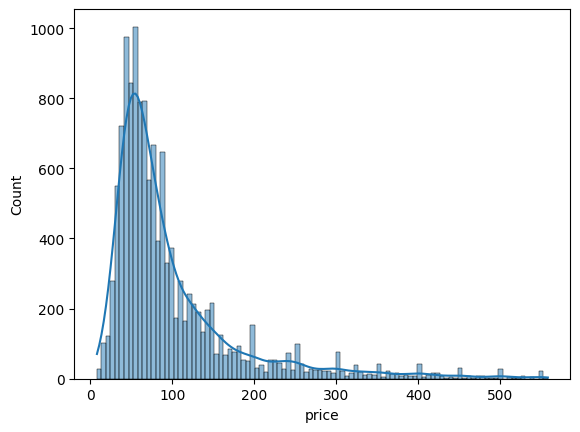

In [24]:
sns.histplot(data=new_F,x=new_F.price,kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1914fda5c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1914fdaa840>,
 'boxes': [<matplotlib.lines.Line2D at 0x1914fd6fbf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1914fdaacc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1914fdaafc0>],
 'means': []}

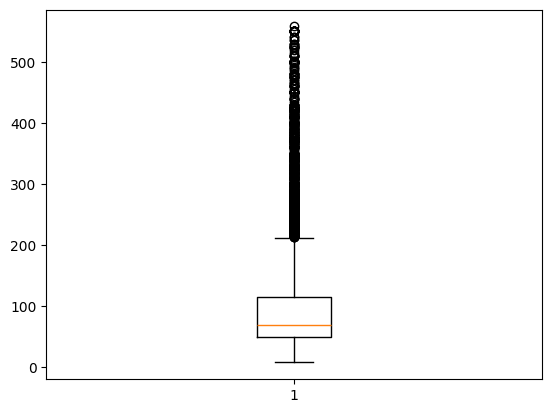

In [50]:
plt.boxplot(new_F['price'])

<font color=RED>Z SCORE METHOD</FONT>

In [25]:
upper_limit=F['price'].mean()+3*F['price'].std()
lower_limit=F['price'].mean()-3*F['price'].std()
print('upper limit;',upper_limit)
print('lower limit;',lower_limit)

upper limit; 559.8041631858042
lower limit; -335.25180788277396


In [26]:
F.loc[(F['price']>upper_limit)|(F['price']<lower_limit)]  # outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.0,4,18181
61,Whitefield,4 Bedroom,5700.00,5.0,650.0,4,11403
157,Mahalakshmi Layout,4 Bedroom,3750.00,4.0,760.0,4,20266
404,Rajaji Nagar,7 BHK,12000.00,6.0,2200.0,7,18333
435,Whitefield,4 Bedroom,11890.00,4.0,700.0,4,5887
...,...,...,...,...,...,...,...
12967,other,5 BHK,5665.84,7.0,988.0,5,17437
12976,other,4 BHK,6652.00,6.0,660.0,4,9921
13000,other,4 Bedroom,6688.00,6.0,700.0,4,10466
13078,other,4 Bedroom,9200.00,4.0,2600.0,4,28260


In [27]:
new_f=F.loc[(F['price']<upper_limit)&(F['price']>lower_limit)]   #Data after removing outliers
new_f

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price', ylabel='Count'>

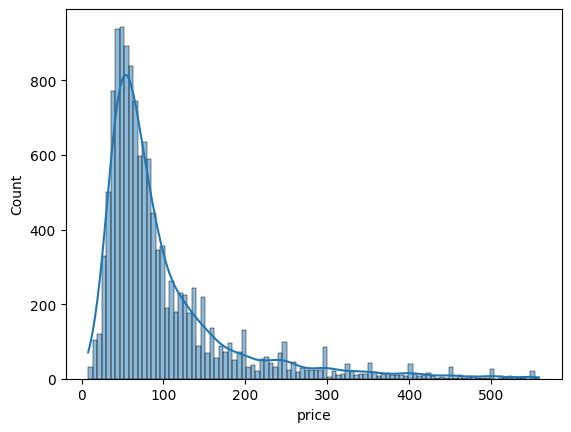

In [28]:
sns.histplot(data=new_f,x=new_f.price,kde=True)

Here we can find that the number of Outliers are same (192) when the normal distribution and zscore method are used.

{'whiskers': [<matplotlib.lines.Line2D at 0x1914fe21a60>,
 'caps': [<matplotlib.lines.Line2D at 0x1914fe21f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1914fe218b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1914fe223f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1914fe226c0>],
 'means': []}

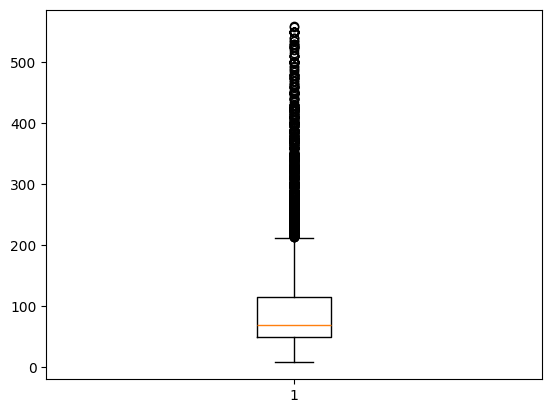

In [51]:
plt.boxplot(new_f['price'])

<font color=RED>HISTPLOT FOR PRICE PER SQFT

<Axes: xlabel='price_per_sqft', ylabel='Count'>

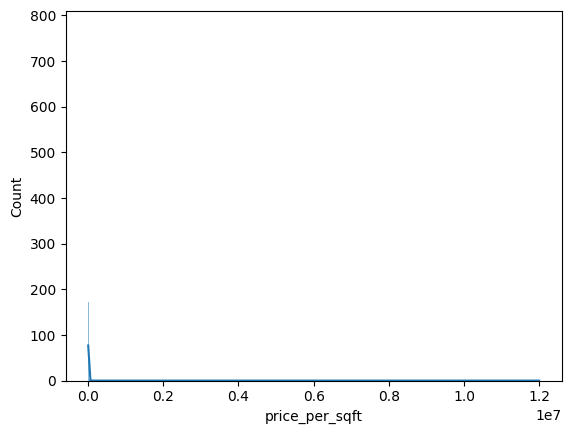

In [36]:
sns.histplot(data=F,x=F.price_per_sqft,kde=True)

<font color=RED>CORRELATION</FONT>

In [34]:
f1=F.drop(columns=["location","size",],axis=1)
f1

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689
13196,3600.0,5.0,400.00,4,11111
13197,1141.0,2.0,60.00,2,5258
13198,4689.0,4.0,488.00,4,10407


In [35]:
corr1=f1.corr()
corr1

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


<Axes: >

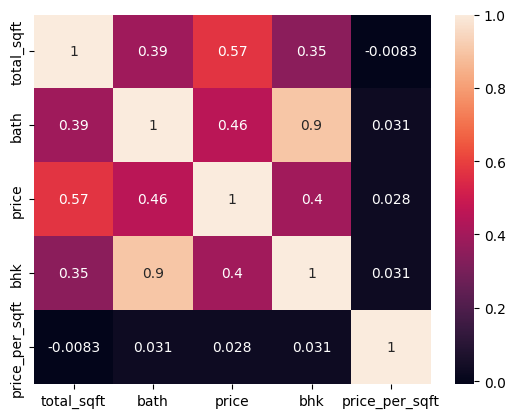

In [38]:
sns.heatmap(corr1,annot=True)

From the correlation matrix we can find that there exist a negative correlation between Total sqft and price per sqft.All other factors are in a positive relation.

<font color=RED>SCATTER PLOT</FONT>

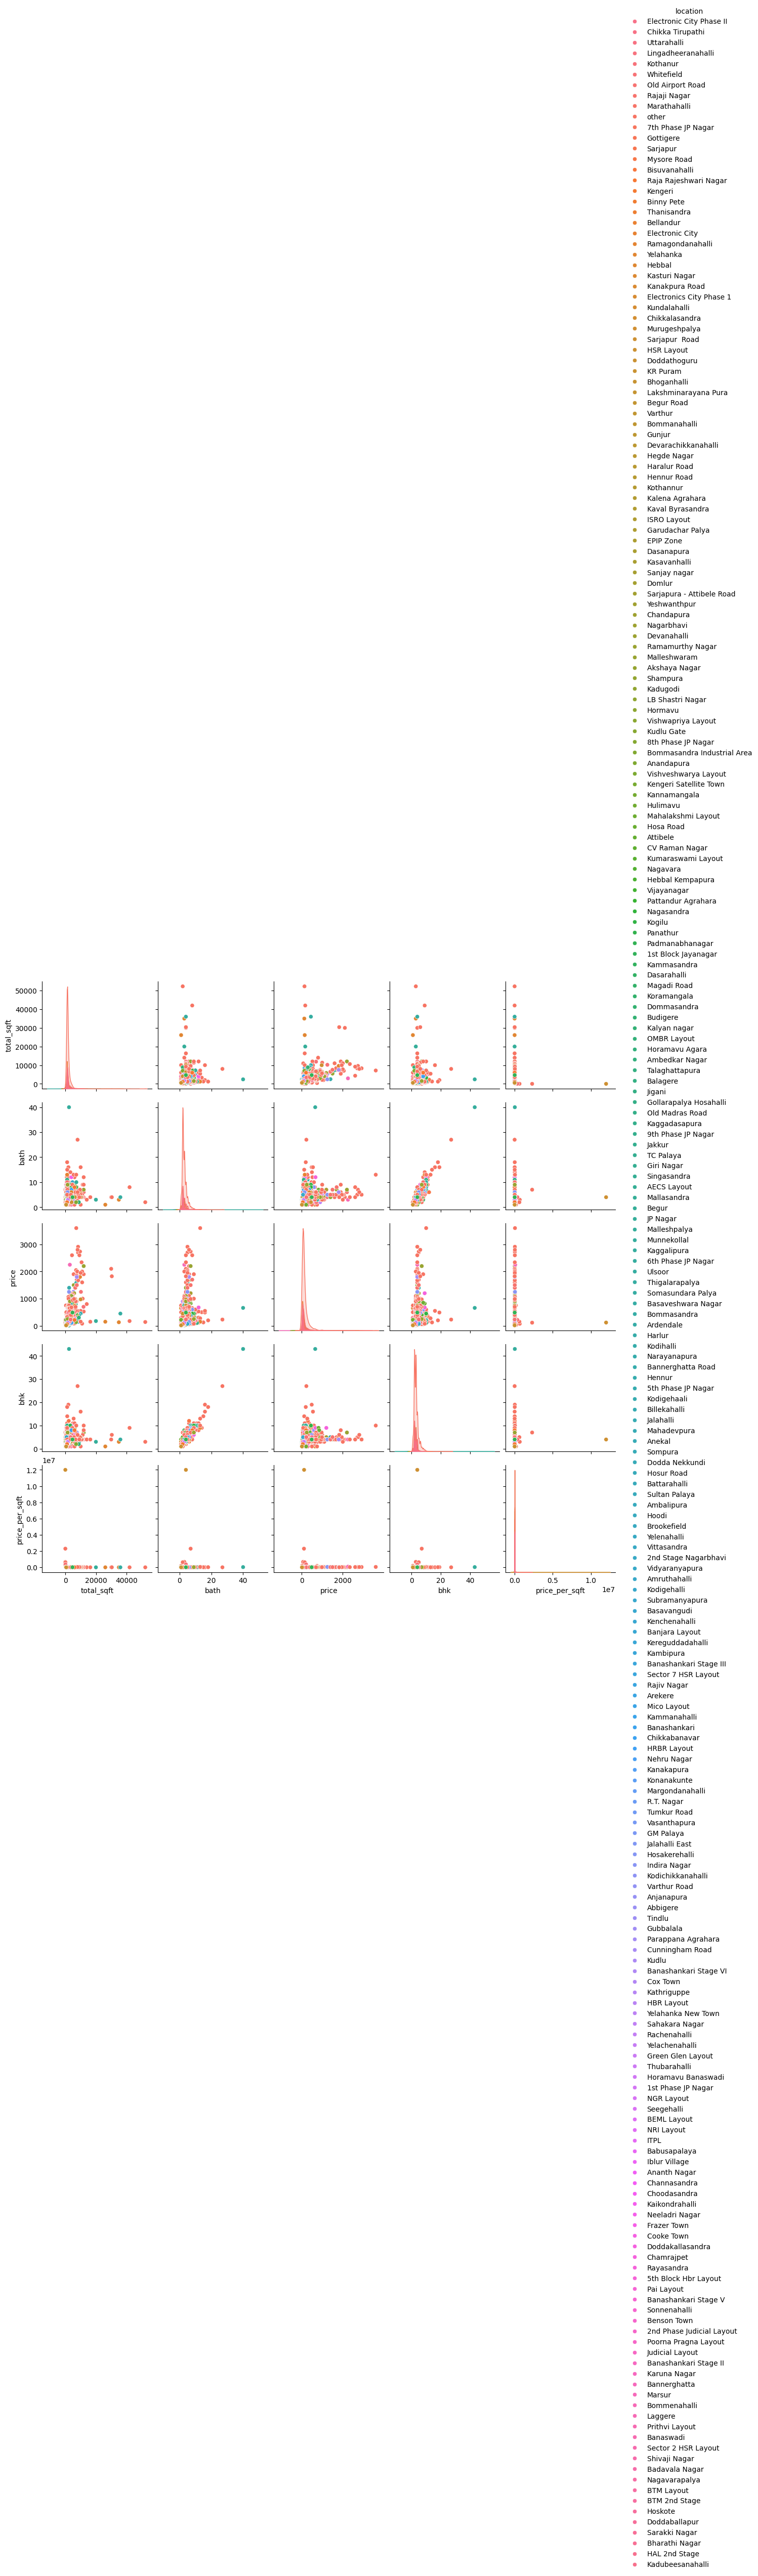

In [57]:
sns.pairplot(F,hue='location')
plt.show()

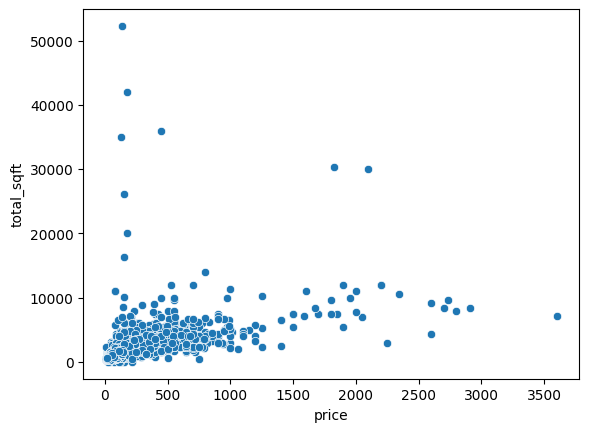

In [54]:
sns.scatterplot(x='price',y='total_sqft',data=F)
plt.show()

BOX PLOT ANALYSIS</FONT>

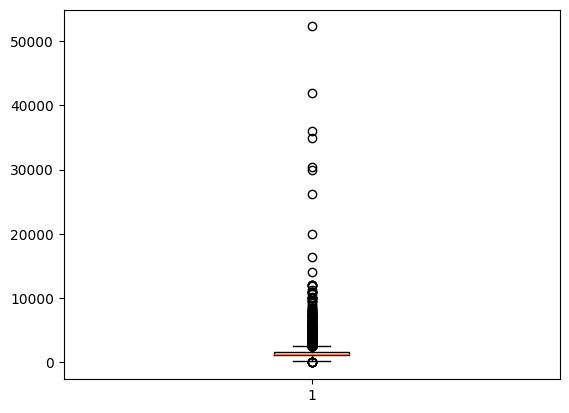

In [55]:
plt.boxplot(F['total_sqft'])
plt.show()

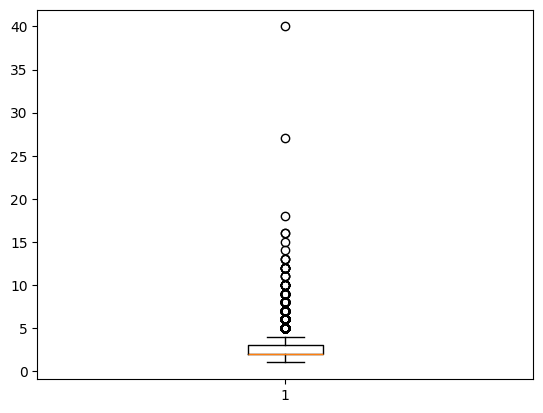

In [56]:
plt.boxplot(F['bath'])
plt.show()

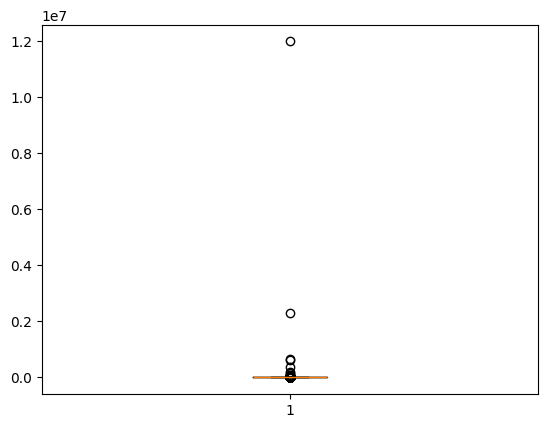

In [58]:
plt.boxplot(F['price_per_sqft'])
plt.show()